In [1]:
# INF 2178 Technical Assignment 3
# Jinhang Luo (1005124777)
# March 23rd, 2024

In [2]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova
from scipy.stats import shapiro, levene

# Loading and read the dataset
data = pd.read_csv('INF2178_A3_data.csv')
# Check the data
data.info()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [3]:
# Cleanning process
# Dropping columns 
columns_to_drop = ['incomeinthousands']
data_new = data.drop(columns=columns_to_drop)

# Change datatype for the better perform ANCOVA.
data_new['incomegroup'] = data_new['incomegroup'].astype('category')

# Calculate reading & math scores change (Fall 1998 - Spring 1999)
data_new['readingscore_change'] = data_new['springreadingscore'] - data_new['fallreadingscore']
data_new['mathscore_change'] = data_new['springmathscore'] - data_new['fallmathscore']

# Check the cleaned new data(No missing data in the cleaned data)
data_new.head(10)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomegroup,readingscore_change,mathscore_change
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,3,12.79,10.56
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,3,32.68,14.49
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,3,-0.27,4.24
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,2,1.57,11.68
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,2,0.86,3.95
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,3,13.68,17.04
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,2,6.03,8.27
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,3,3.42,5.37
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,3,18.69,12.53
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,3,5.67,5.17


In [4]:
# EDA
# Descriptive statistics
# Print description of the data
data_new.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,readingscore_change,mathscore_change
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,11.556963,10.671218
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,8.085004,6.855263
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,-44.760000,-22.160000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,6.470000,6.010000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,10.400000,9.860000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,15.150000,14.330000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,91.940000,75.350000


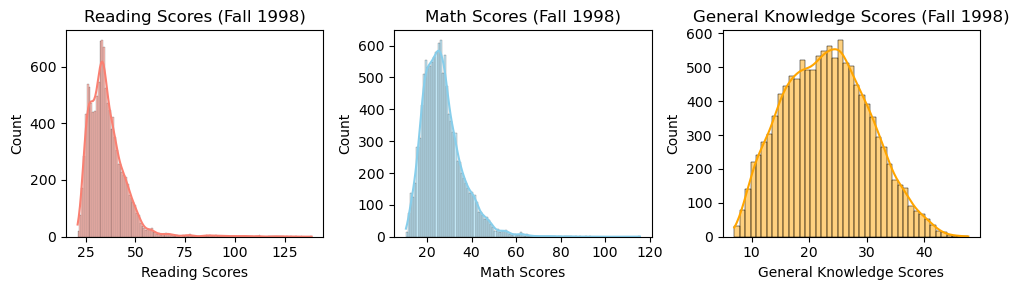

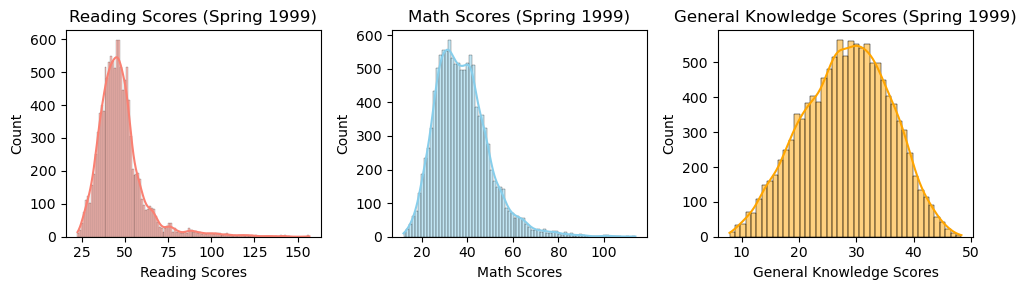

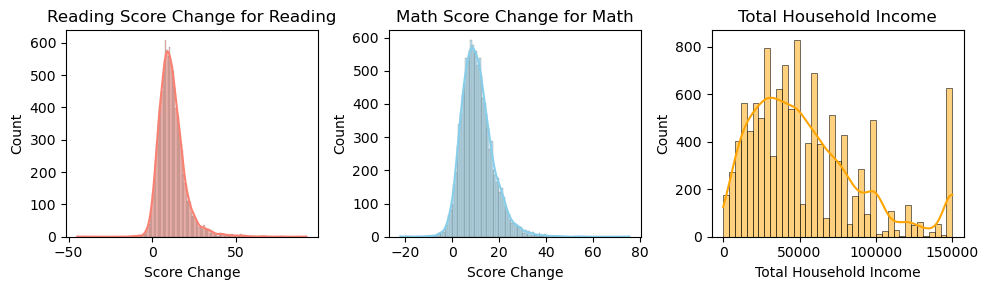

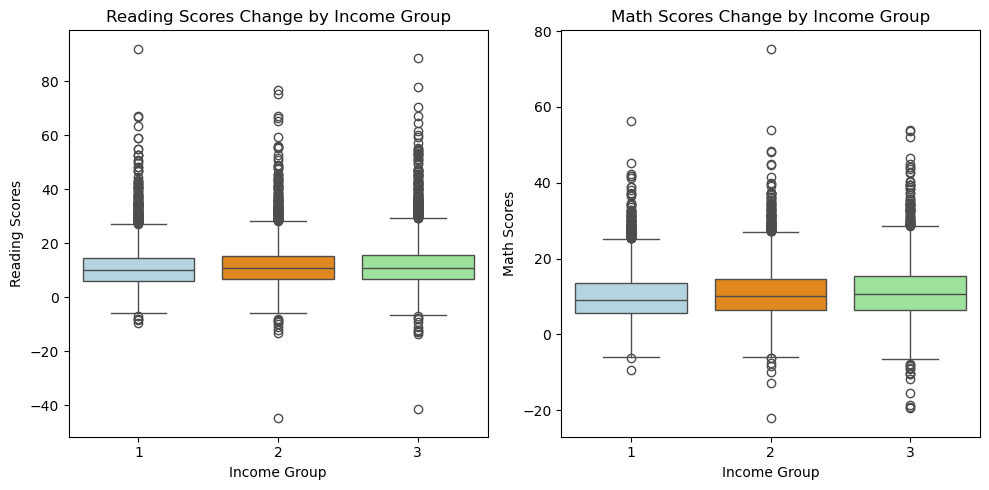

In [5]:
# Plot histograms (Fall 1998)
fig, axs = plt.subplots(1, 3, figsize=(10, 3)) 

sns.histplot(data=data_new, x="fallreadingscore", ax=axs[0],kde=True,color='salmon')
axs[0].set_title('Reading Scores (Fall 1998)')  
axs[0].set_xlabel('Reading Scores')
axs[0].set_ylabel('Count')


sns.histplot(data=data_new, x="fallmathscore", ax=axs[1], kde=True,color='skyblue')
axs[1].set_title('Math Scores (Fall 1998)')  
axs[1].set_xlabel('Math Scores')
axs[1].set_ylabel('Count')

sns.histplot(data=data_new, x="fallgeneralknowledgescore", ax=axs[2],kde=True,color='orange')
axs[2].set_title('General Knowledge Scores (Fall 1998)')  
axs[2].set_xlabel('General Knowledge Scores')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Plot histograms (Spring 1999)
fig, axs = plt.subplots(1, 3, figsize=(10, 3)) 

sns.histplot(data=data_new, x="springreadingscore", ax=axs[0],kde=True,color='salmon')
axs[0].set_title('Reading Scores (Spring 1999)')  
axs[0].set_xlabel('Reading Scores')
axs[0].set_ylabel('Count')


sns.histplot(data=data_new, x="springmathscore", ax=axs[1], kde=True,color='skyblue')
axs[1].set_title('Math Scores (Spring 1999)')  
axs[1].set_xlabel('Math Scores')
axs[1].set_ylabel('Count')

sns.histplot(data=data_new, x="springgeneralknowledgescore", ax=axs[2],kde=True,color='orange')
axs[2].set_title('General Knowledge Scores (Spring 1999)')  
axs[2].set_xlabel('General Knowledge Scores')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Plot histograms (scores change from fall 1998 to spring 1999)
fig, axs = plt.subplots(1, 3, figsize=(10, 3)) 

sns.histplot(data=data_new, x="readingscore_change", ax=axs[0],kde=True,color='salmon')
axs[0].set_title('Reading Score Change for Reading')  
axs[0].set_xlabel('Score Change')
axs[0].set_ylabel('Count')


sns.histplot(data=data_new, x="mathscore_change", ax=axs[1], kde=True,color='skyblue')
axs[1].set_title('Math Score Change for Math')  
axs[1].set_xlabel('Score Change')
axs[1].set_ylabel('Count')

# Plot a higtogram (total household income)
sns.histplot(data=data_new, x="totalhouseholdincome", ax=axs[2], kde=True,color='orange')
axs[2].set_title('Total Household Income')  
axs[2].set_xlabel('Total Household Income')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Plot Boxplots (scores change from fall 1998 to spring 1999 by income group)
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 
sns.boxplot(data=data_new,x='incomegroup', y='readingscore_change', hue = 'incomegroup', palette=['#ADD8E6', '#FF8C00','#90EE90'], ax=axs[0],legend=False)
axs[0].set_title('Reading Scores Change by Income Group')
axs[0].set_xlabel('Income Group')
axs[0].set_ylabel('Reading Scores')

sns.boxplot(data=data_new,x='incomegroup', y='mathscore_change', hue = 'incomegroup', palette=['#ADD8E6', '#FF8C00','#90EE90'], ax=axs[1],legend=False)
axs[1].set_title('Math Scores Change by Income Group')
axs[1].set_xlabel('Income Group')
axs[1].set_ylabel('Math Scores')


plt.tight_layout()
plt.show()

In [6]:
# Perform the ANCOVA (readingscore change & mathscore change)
model1  = sm.formula.ols('readingscore_change ~ incomegroup + fallgeneralknowledgescore', data=data_new).fit()
print(model1.summary())
model2  = sm.formula.ols ('mathscore_change ~ incomegroup + fallgeneralknowledgescore', data = data_new).fit()
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     readingscore_change   R-squared:                       0.023
Model:                             OLS   Adj. R-squared:                  0.023
Method:                  Least Squares   F-statistic:                     95.49
Date:                 Sun, 24 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                         02:39:23   Log-Likelihood:                -41730.
No. Observations:                11933   AIC:                         8.347e+04
Df Residuals:                    11929   BIC:                         8.350e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

In [7]:
# Perform the post-hoc Tukey HSD test (readingscore change)
tukey_hsd1 = pairwise_tukeyhsd(endog=data_new['readingscore_change'], groups=data_new['incomegroup'], alpha=0.05)
# Show the summary of the Tukey HSD test
print(tukey_hsd1.summary())

# Perform the post-hoc Tukey HSD test (mathscore change)
tukey_hsd2 = pairwise_tukeyhsd(endog=data_new['mathscore_change'], groups=data_new['incomegroup'], alpha=0.05)
# Show the summary of the Tukey HSD test
print(tukey_hsd2.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.8387    0.0 0.4246 1.2527   True
     1      3   1.4301    0.0 1.0079 1.8523   True
     2      3   0.5915 0.0053 0.1458 1.0371   True
--------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.9377    0.0 0.5871 1.2883   True
     1      3   1.4406    0.0 1.0831 1.7982   True
     2      3    0.503 0.0051 0.1256 0.8803   True
--------------------------------------------------


/opt/conda/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


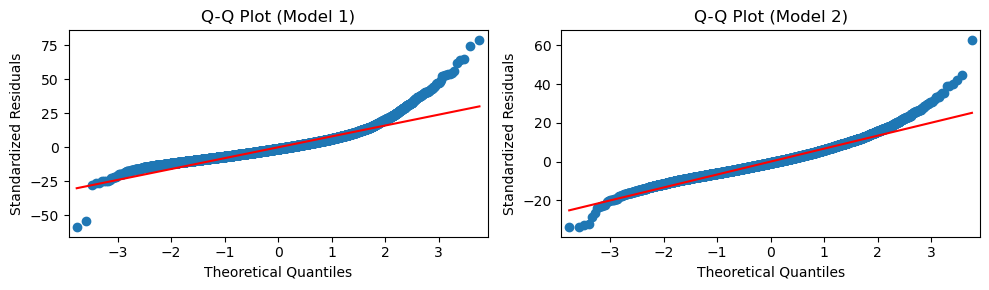

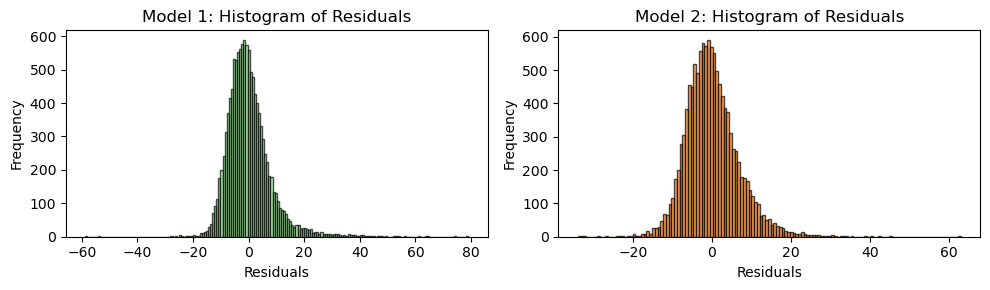

In [8]:
# Assumption 1: Normality with Q-Q plot for Model1(check above)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sm.qqplot(model1.resid, line='s', ax=ax[0],color = '#90EE90')
ax[0].set_title('Q-Q Plot (Model 1)')
ax[0].set_xlabel('Theoretical Quantiles')
ax[0].set_ylabel('Standardized Residuals')

# Assumption 1: Normality with Q-Q plot for Model2(check above)
sm.qqplot(model2.resid, line='s', ax=ax[1],color = '#ff7f0e')
ax[1].set_title('Q-Q Plot (Model 2)')
ax[1].set_xlabel('Theoretical Quantiles')
ax[1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 3)) 

# Histogram for Model1
axs[0].hist(model1.resid, bins='auto', histtype='bar', ec='k', color = '#90EE90', alpha=0.7)
axs[0].set_title('Model 1: Histogram of Residuals')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

# Histogram for Model2
axs[1].hist(model2.resid, bins='auto', histtype='bar', ec='k',color = '#ff7f0e', alpha=0.7)
axs[1].set_title('Model 2: Histogram of Residuals')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [9]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
# Model 1
w, pvalue = stats.shapiro(model1.resid)
print(w,pvalue) 

# Assumption 1: residuals are normally distributed: Shapiro Wilk test
# Model 2
w, pvalue = stats.shapiro(model2.resid)
print(w,pvalue) 

0.8996317386627197 0.0
0.9664044380187988 0.0


/opt/conda/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
# Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
groups = [residuals for _, residuals in data_new.groupby('incomegroup',observed=True)['readingscore_change']]

# Perform Levene's test (Model1)
stat, p = levene(*groups)
print(stat, p)

# Perform Levene's test (Model2)
groups = [residuals for _, residuals in data_new.groupby('incomegroup',observed=True)['mathscore_change']]
stat, p = levene(*groups)

print(stat, p)


19.7280103692154 2.794929503613517e-09
22.215180179067378 2.344180384098772e-10


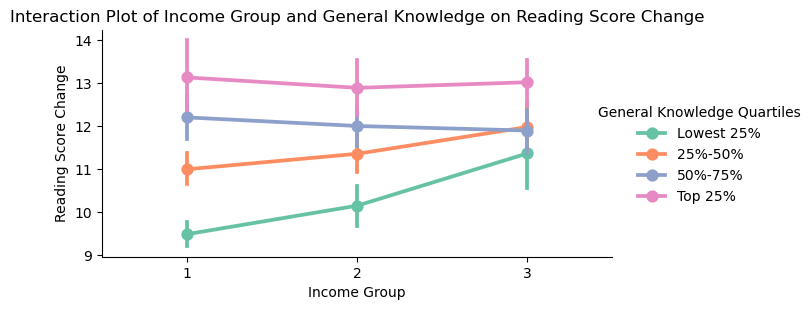

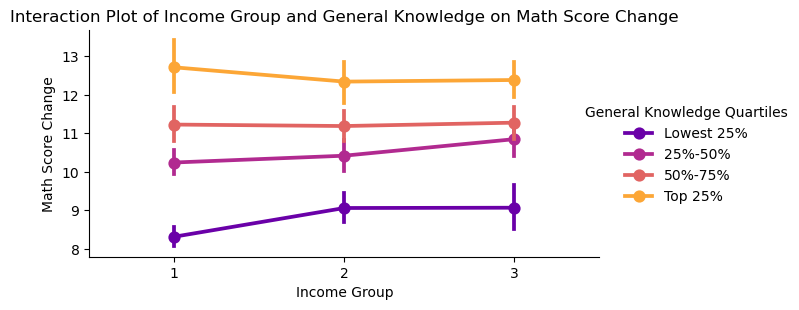

In [11]:
# Interaction plot

# Making fall general knowledge score into quartiles for better plot
data_new['fallgeneralknowledge_cat'] = pd.qcut(data_new['fallgeneralknowledgescore'], q=4, labels=['Lowest 25%', '25%-50%', '50%-75%', 'Top 25%'])

g = sns.catplot(x='incomegroup', y='readingscore_change', hue='fallgeneralknowledge_cat', kind='point', data=data_new, height=3, aspect=2, palette='Set2')
plt.title('Interaction Plot of Income Group and General Knowledge on Reading Score Change')
plt.ylabel('Reading Score Change')
plt.xlabel('Income Group')
g._legend.set_title('General Knowledge Quartiles')
plt.show()

g = sns.catplot(x='incomegroup', y='mathscore_change', hue='fallgeneralknowledge_cat', kind='point', data=data_new, height=3, aspect=2, palette='plasma')
plt.title('Interaction Plot of Income Group and General Knowledge on Math Score Change')
plt.ylabel('Math Score Change')
plt.xlabel('Income Group')
g._legend.set_title('General Knowledge Quartiles')
plt.show()
